In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
ss = StandardScaler()
le = LabelEncoder()
from tqdm.auto import tqdm

# **Problem Statement:**
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

In [2]:
data = pd.read_csv('/content/customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####Data Manipulation:

In [ ]:
#a. Find the total number of male customers
data.gender.value_counts()[0]

3555

In [ ]:
#b. Find the total number of customers whose Internet Service is ‘DSL’
data[data.InternetService=='DSL'].InternetService.count()

2421

In [ ]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
new_customer = data[(data.tenure < 10) & (data.TotalCharges < '500')]
new_customer.shape
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [ ]:
#c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer = data[(data.gender == 'Female') & (data.SeniorCitizen==1) & (data.PaymentMethod=='Mailed check')]
new_customer.shape
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


####Data Visualization:

<Axes: ylabel='Churn'>

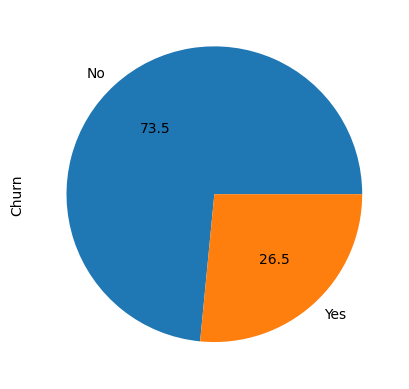

In [ ]:
#a. Build a pie-chart to show the distribution of customers would be churning out
data.Churn.value_counts().plot.pie(autopct = '%0.1f')

<BarContainer object of 3 artists>

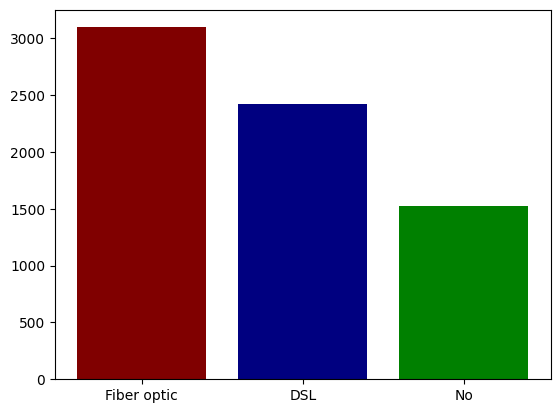

In [ ]:
#b. Build a bar-plot to show the distribution of ‘Internet Service’
plt.bar(data.InternetService.value_counts().index,data.InternetService.value_counts().values,color = ['maroon','navy','green'])

####Model Building:

In [ ]:
'''
a. Build a sequential model using Keras, to find out if the customer would churn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

'''

In [ ]:
x = data['tenure']
y = data['Churn']

In [ ]:
x = ss.fit_transform(np.array(x).reshape(-1,1))
y = le.fit_transform(y)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5634, 1), (1409, 1), (5634,), (1409,))

In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
#input
model.add(tf.keras.layers.Dense(12,input_dim=1,activation = 'relu',name = 'Input'))

#hidden
model.add(tf.keras.layers.Dense(8,activation = 'relu',name= 'hidden1'))

#output
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid', name = 'output'))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 hidden1 (Dense)             (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile('adam',loss=tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [ ]:
model.fit(x=xtrain,y=ytrain,validation_data=[xtest,ytest],epochs = 150)

Epoch 1/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5847 - accuracy: 0.7295 - val_loss: 0.5190 - val_accuracy: 0.7353
Epoch 2/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7345 - val_loss: 0.5045 - val_accuracy: 0.7353
Epoch 3/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.7345 - val_loss: 0.5014 - val_accuracy: 0.7353
Epoch 4/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5169 - accuracy: 0.7412 - val_loss: 0.5003 - val_accuracy: 0.7353
Epoch 5/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.7394 - val_loss: 0.4999 - val_accuracy: 0.7353
Epoch 6/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.7426 - val_loss: 0.4977 - val_accuracy: 0.7566
Epoch 7/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5134 - accuracy: 0.7472 - val_loss: 0.4972 - val_accuracy: 0.7544

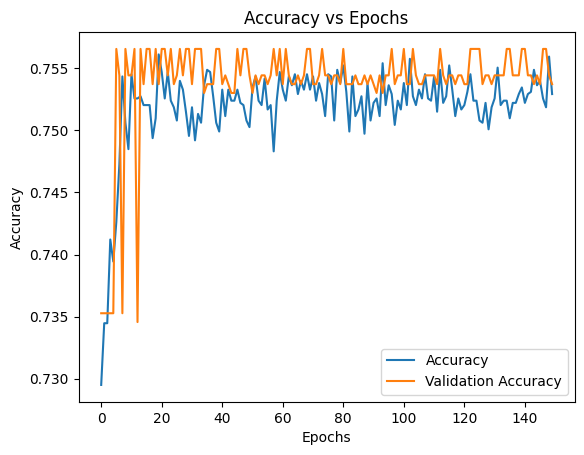

In [ ]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
np.mean(model.history.history['val_accuracy'])

0.7538774565855662

In [ ]:
ypred = []
for i in tqdm(xtest):
  pred = model.predict(i,verbose = 0)
  if pred>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

  0%|          | 0/1409 [00:00<?, ?it/s]

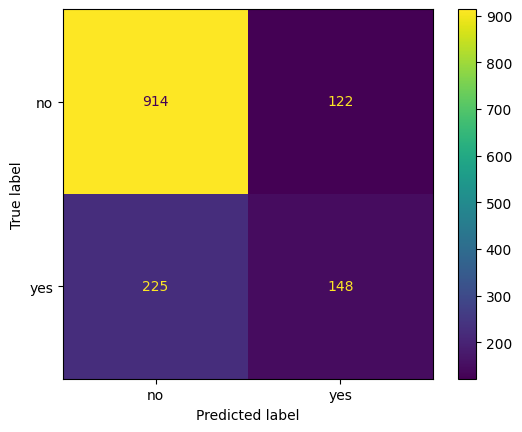

In [ ]:
cm = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(cm,display_labels = ['no','yes']).plot()

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1036
           1       0.55      0.40      0.46       373

    accuracy                           0.75      1409
   macro avg       0.68      0.64      0.65      1409
weighted avg       0.74      0.75      0.74      1409



In [ ]:
'''

b. Build the 2nd model using same target and feature variables:
i. Add a drop-out layer after the input layer with drop-out value of 0.3
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
iii. Predict the values on the test set and build a confusion matrix
iv. Plot the ‘Accuracy vs Epochs’ graph

'''

In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
#input
model.add(tf.keras.layers.Dense(12,input_dim = 1,activation = 'relu',name = 'Input'))

#dropout
model.add(tf.keras.layers.Dropout(0.3,name = 'Dropout1'))

#hidden
model.add(tf.keras.layers.Dense(8,activation = 'relu',name= 'hidden1'))

#dropout
model.add(tf.keras.layers.Dropout(0.2,name = 'Dropout2'))

#output
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid', name = 'output'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 Dropout1 (Dropout)          (None, 12)                0         
                                                                 
 hidden1 (Dense)             (None, 8)                 104       
                                                                 
 Dropout2 (Dropout)          (None, 8)                 0         
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile('adam',loss=tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [ ]:
model.fit(x=xtrain,y=ytrain,validation_data=[xtest,ytest],epochs = 150)

Epoch 1/150
177/177 [==============================] - 2s 5ms/step - loss: 0.6612 - accuracy: 0.6667 - val_loss: 0.5993 - val_accuracy: 0.7353
Epoch 2/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5706 - accuracy: 0.7339 - val_loss: 0.5185 - val_accuracy: 0.7353
Epoch 3/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5468 - accuracy: 0.7345 - val_loss: 0.5079 - val_accuracy: 0.7353
Epoch 4/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5381 - accuracy: 0.7345 - val_loss: 0.5029 - val_accuracy: 0.7353
Epoch 5/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7389 - val_loss: 0.5007 - val_accuracy: 0.7353
Epoch 6/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5329 - accuracy: 0.7368 - val_loss: 0.5011 - val_accuracy: 0.7353
Epoch 7/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7362 - val_loss: 0.5014 - val_accuracy: 0.7353

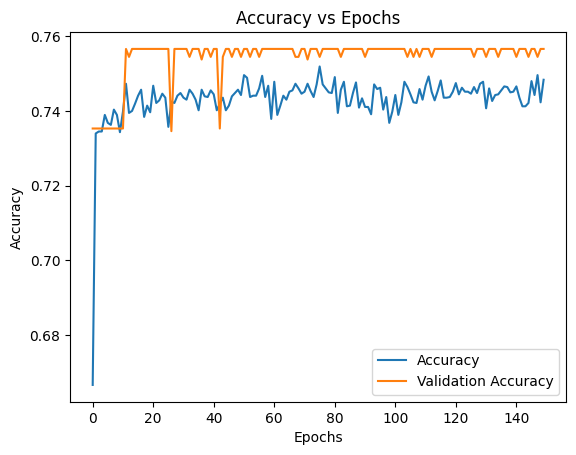

In [ ]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
np.mean(model.history.history['val_accuracy'])

0.7543505863348643

In [ ]:
ypred = []
for i in tqdm(xtest):
  pred = model.predict(i,verbose = 0)
  if pred>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

  0%|          | 0/1409 [00:00<?, ?it/s]

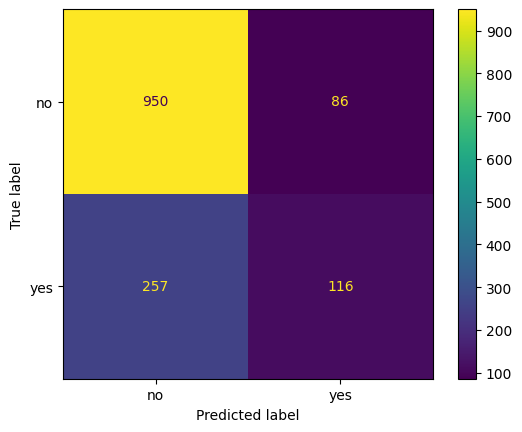

In [ ]:
cm = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(cm,display_labels = ['no','yes']).plot()

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1036
           1       0.57      0.31      0.40       373

    accuracy                           0.76      1409
   macro avg       0.68      0.61      0.63      1409
weighted avg       0.73      0.76      0.73      1409



In [ ]:
'''
c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph
'''

In [4]:
data[['tenure','MonthlyCharges','TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [5]:
data['TotalCharges'] = le.fit_transform(data['TotalCharges'])

In [6]:
x1 = data[['tenure','MonthlyCharges','TotalCharges']]
y = data.Churn

In [8]:
x1.shape,y.shape

((7043, 3), (7043,))

In [9]:
x1 = ss.fit_transform(x1)
y = le.fit_transform(y)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size = 0.2,random_state = 42)

In [13]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5634, 3), (1409, 3), (5634,), (1409,))

In [ ]:
#del model

In [14]:
model = tf.keras.models.Sequential()

In [15]:
#input
model.add(tf.keras.layers.Dense(12,input_dim = 3,activation = 'relu',name = 'Input'))

#hidden
model.add(tf.keras.layers.Dense(8,activation = 'relu',name= 'Hidden1'))

#output
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid', name = 'Output'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                48        
                                                                 
 Hidden1 (Dense)             (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile('adam',loss=tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [18]:
model.fit(x=xtrain,y=ytrain,validation_data = [xtest,ytest],epochs = 150)

Epoch 1/150
177/177 [==============================] - 2s 5ms/step - loss: 0.5967 - accuracy: 0.6922 - val_loss: 0.4927 - val_accuracy: 0.7764
Epoch 2/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7753 - val_loss: 0.4386 - val_accuracy: 0.7963
Epoch 3/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7815 - val_loss: 0.4318 - val_accuracy: 0.7899
Epoch 4/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7787 - val_loss: 0.4302 - val_accuracy: 0.7913
Epoch 5/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7796 - val_loss: 0.4290 - val_accuracy: 0.7921
Epoch 6/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7804 - val_loss: 0.4282 - val_accuracy: 0.7928
Epoch 7/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7806 - val_loss: 0.4286 - val_accuracy: 0.7913

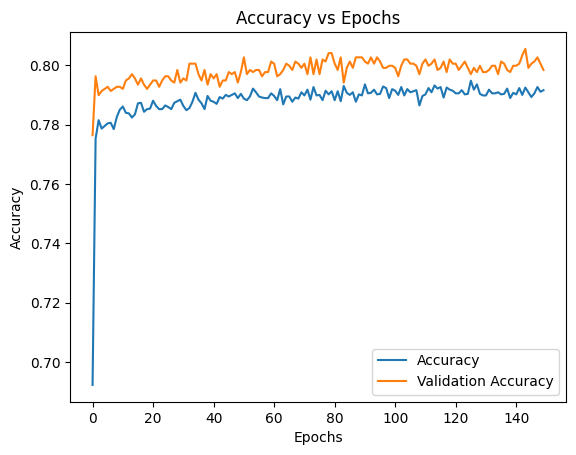

In [19]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
np.mean(model.history.history['val_accuracy'])

0.7981783799330393

In [32]:
xtest.shape

(1409, 3)

In [33]:
model.predict(xtest).shape

45/45 [==============================] - 0s 2ms/step


(1409, 1)

In [35]:
ypred = []
pred = model.predict(xtest,verbose = 0)
for i in pred:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

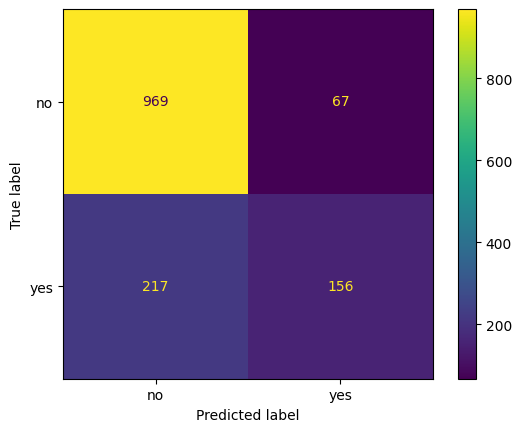

In [36]:
cm = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(cm,display_labels = ['no','yes']).plot()

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.70      0.42      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



####Findings:

*The data is highly imbalanced with biasing towards 'no' in churn.
Out of Three models the last model is performing the best as it has three features to train so the model can better understanding of churn dependency when compared to other two. The model with dropout layer shows stability in the validation accuracy curve as it has not learned the noise like the others but its performance is not that great compared to the base model as two dropout layers are intorduced for such a small neural network and dataset which drops multiple nodes on every epoch which in turn make the model less effective.*